Code Adapted from: 

Pepis. (2021, January 8). Animated sir model for coronavirus spread. Hackster.io. Retrieved November 30, 2022, from https://www.hackster.io/pepis/animated-sir-model-for-coronavirus-spread-72c700 

In [ ]:
#Importing the Packages
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
#Setting up the parameters 
n=50  #number of individuals
infect_in = 40 #percentage of infected people at the beginning of the simulation (0-100%)
infection_time=10  #radius of transmission in pixels (0-100)
p_infection_time=10 #probability of transmission in percentage (0-100%) 
isolation = 70  #percentage of the people in quarantine (0-100%)
recover_time=10000   #time taken to recover in number of frames (0-infinity) 
contagious=0
individual=[]


In [ ]:
# Main class that initially sets all the positions 
class Individuals:
    def __init__(self,i, posx, posy, objx, objy, v, recover_time):
        self.velociety = v
        self.objx = objx
        self.objy = objy
        self.idx = i
        self.name = "Individual " + str(i)
        self.infected = False
        self.susceptible = True
        self.removed = False
        self.posx = posx
        self.posy = posy
        self.deltax = (self.objx - self.posx) / self.velociety
        self.deltay = (self.objy - self.posy) / self.velociety
       
        # time in which the individual was infected
        self.infection_time = -1
        # time that the infection lasts, recover time
        self.recover_time = recover_time

    def __str__(self):
        return self.name + " on position (" + str(self.posx) + ", " + str(self.posy) + ")"

    def infect(self, i):
        # infect
        self.infected = True
        self.susceptible = False
        self.removed = False
        self.infection_time = i

    def remove(self):
        # recovered
        self.removed = True
        self.susceptible = False
        self.infected = False

    def move(self, objx, objy):
        # create a new target position
        self.objx = objx
        self.objy = objy
        self.deltax = (self.objx - self.posx) / self.velociety
        self.deltay = (self.objy - self.posy) / self.velociety
      
    def check_infection(self, i):
        # remove the person if the established infection time has passed
        if self.infection_time > -1:
            if i - self.infection_time > self.recover_time:
                self.remove()

    def update_pos(self, n_posx, n_posy):
        # animate the movement
        if n_posx == 0 and n_posy == 0:
            self.posx = self.posx + self.deltax
            self.posy = self.posy + self.deltay
        else:
            self.posx = n_posx
            self.posy = n_posy

        if abs(self.posx-self.objx) < 3 and abs(self.posy-self.objy) < 3:
            self.move(np.random.random() * 100, np.random.random() * 100)
        if self.posx > 100:
            self.posx = 100
        if self.posy > 100:
            self.posy = 100
        if self.posx < 0:
            self.posx = 0
        if self.posy < 0:
            self.posy = 0

    def get_color(self):
        if self.infected:
            return 'red'
        if self.susceptible:
            return 'blue'
        if self.removed:
            return 'gray'

    def get_pos(self):
        return self.posx, self.posy

    def get_dist(self, x, y):
        # calculate the distance between this person and another.
        return math.sqrt((self.posx-x)**2+(self.posy-y)**2)

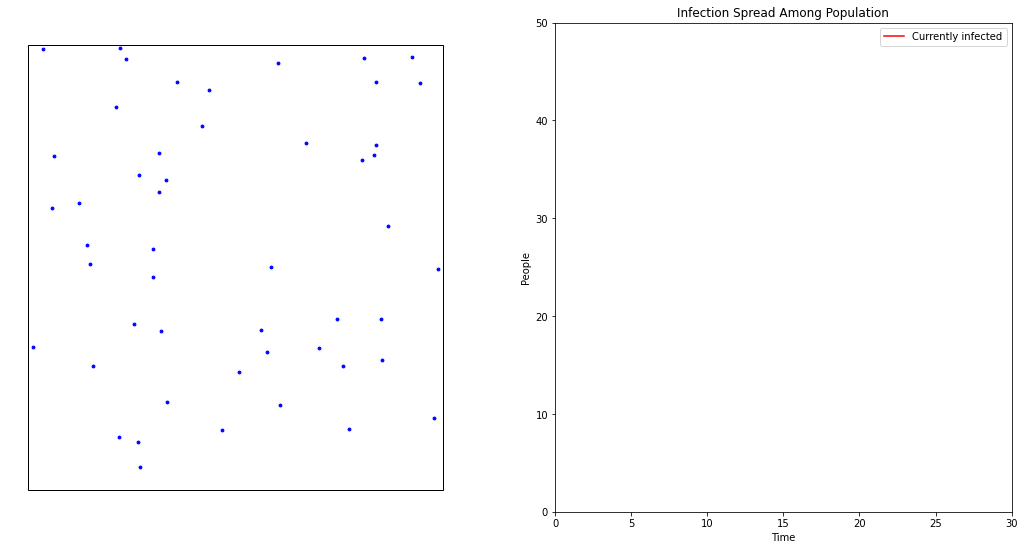

In [ ]:
#creating all the individuals in random positions. Infecting some of them
for i in range(n):
    p = Individuals(i,np.random.random()*100, np.random.random()*100,
                np.random.random() * 100, np.random.random() * 100,
                (np.random.random()+0.5)*100,recover_time)

    if np.random.random()<infect_in/100:
        p.infect(0)
        contagious=contagious+1
        
    individual.append(p)


#this creates all the graphics
fig = plt.figure(figsize=(18,9)) 
ax = fig.add_subplot(1,2,1)
cx = fig.add_subplot(1,2,2)
ax.axis('off')
cx.axis([0,30,0,n])
scatt=ax.scatter([p.posx for p in individual],
           [p.posy for p in individual],c='blue',s=8)
caja = plt.Rectangle((0,0),100,100,fill=False)
ax.add_patch(caja)
cvst,=cx.plot(contagious,color="red",label="Currently infected")
rvst,=cx.plot(contagious,color="white")
cx.legend(handles=[cvst])
cx.set_title("Infection Spread Among Population")
cx.set_xlabel("Time")
cx.set_ylabel("People")

ct=[contagious]
rt=[0]
t=[0]


#function excecuted frame by frame
def update(frame,rt,ct,t):
    count = 0
    recov = 0
    color = []
    sizes = [8 for p in individual]
    for p in individual:
        #check how much time the person has been sick
        p.check_infection(frame)
        #animate the movement of each person
        p.update_pos(0,0)
        if p.removed:
            recov+=1 #count the amount of recovered
        if p.infected:
            count=count+1 #count the amount of infected
            #check for people around the sick individual and infect the ones within the
            # transmission radius given the probability
            for per in individual:
                if per.idx==p.idx or per.infected or per.removed:
                    pass
                else:
                    d=p.get_dist(per.posx,per.posy)
                    if d<infection_time:
                        if np.random.random() < infection_time / 100:
                            per.infect(frame)
                            sizes[per.idx]=80


        color.append(p.get_color()) #change dot color according to the person's status

    #update the plotting data
    ct.append(count)
    rt.append(recov)
    t.append(frame)
 #tramsfer de data to the matplotlib graphics
    offsets=np.array([[p.posx for p in individual],
                     [p.posy for p in individual]])
    scatt.set_offsets(np.ndarray.transpose(offsets))
    scatt.set_color(color)
    scatt.set_sizes(sizes)
    cvst.set_data(t,ct)
    rvst.set_data(t,rt)
    return scatt,cvst,rvst

In [ ]:
ani = FuncAnimation(fig, update, interval=25,fargs=(rt,ct,t),blit=True)
plt.show()
HTML(ani.to_jshtml())

In [ ]:
print('At the beginning of the 30 days, the number of people initially infected were:',ct[0])
print('At the end of 30 days, the number of people still infected was:',ct[-1])



At the beginning of the 30 days, the number of people initially infected were: 18
At the end of 30 days, the number of people still infected was: 48
